In [1]:
import requests
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from fa2 import ForceAtlas2
import seaborn as sns
import numpy as np
from pprint import pprint
import pickle
import re
import string
import warnings
from itertools import combinations
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

# Get Dataframe with espiodes

In [2]:
url = 'https://southpark.fandom.com/wiki/List_of_Episodes'
page = pd.read_html(url)

In [3]:
len(page)

34

In [4]:
df_characters= pd.read_csv("characters.csv")
df_characters = df_characters[df_characters.Name != 'South Park']

In [5]:
def read_episode_cast(df_episodes):
    def get_cast(page_text):
        element_titles = re.findall('title="[\[[a-zA-Z0-9\'\\ -.]*', page_text)
        clean_txt = [tmp.replace('"', '').replace('title=', '') for tmp in element_titles]
        clean_txt = [tmp if tmp != 'Jerome &quot' else 'Jerome "Chef" McElroy' for tmp in clean_txt]
        nodes = list(set(txt for txt in clean_txt if txt in df_characters.Name.values))
        return nodes
    
    episode_cast = []
    for row in df_episodes.iterrows():
        title = row[1]['Title'].replace(' ', '_')
        title = title.replace('%', '%25')
        title = title.replace('!!!', '')
        title = title.replace('#', '')
        title = title.replace('\'', '%27')
        title = title.replace('?', '%3F')
        if title == 'Imaginationland_Episode_I':
            title = 'Imaginationland'
        elif title == 'Imaginationland_Episode_II':
            title == ' Imaginationland,_Episode_II'
        elif title == 'Crème_Fraiche':
            title == 'Crème_Fraiche'
        code = row[1]['Code']
        print(f'{code}: {title}')
        if code == '1414':
            episode_cast.append(['Stan Marsh', 'Kyle Broflovski', 'Eric Cartman', 'Kenny McCormick', 'Craig Tucker', 'Randy Marsh','Sharon Marsh', 'Sheila Broflovski', 'Michael', 'Rosemary', 'Alton Brown', 'Bobby Flay', 'Guy Fieri', 'Jamie Oliver', 'Paula Deen'])
        else:
            url_tmp = f'https://southpark.fandom.com/wiki/{title}/Script'
            response = requests.get(url_tmp)
            episode_cast.append(get_cast(response.text))
    return episode_cast

In [6]:
def get_episodes_df(page):
    def clear_df(df):
        df_tmp = df.drop([0], axis=1)
        df_tmp.columns = df_tmp.loc[0].values
        df_tmp = df_tmp.drop([0])
        df_clean = df_tmp[(df_tmp['#'].str.isnumeric() == True) | (df_tmp['#'].isna() == True)].copy()
        df_clean['Title'] = df_clean['Title'].str.replace('\"', '')
        df_clean = df_clean[df_clean['Title'] != 'TBA']
        descriptions = [df_tmp.loc[i+1].values[0] for i in df_clean.index]
        df_clean['Descriptions'] = descriptions
        df_clean.reset_index(drop=True, inplace=True)
        return df_clean
    
    df_list = []

    for i, df_tmp in enumerate(page[4:28], start=1):
        df_tmp = clear_df(df_tmp)
        df_tmp['Cast'] = read_episode_cast(df_tmp)
        df_tmp['Season'] = i
        df_list.append(df_tmp)

    df_episodes = pd.concat(df_list, ignore_index=True)
    return df_episodes

In [7]:
df_episodes = get_episodes_df(page)

101: Cartman_Gets_an_Anal_Probe
102: Weight_Gain_4000
103: Volcano
104: Big_Gay_Al%27s_Big_Gay_Boat_Ride
105: An_Elephant_Makes_Love_to_a_Pig
106: Death
107: Pinkeye
109: Starvin%27_Marvin
110: Mr._Hankey,_the_Christmas_Poo
108: Damien
111: Tom%27s_Rhinoplasty
112: Mecha-Streisand
113: Cartman%27s_Mom_is_a_Dirty_Slut
201: Terrance_and_Phillip_in_Not_Without_My_Anus
202: Cartman%27s_Mom_is_Still_a_Dirty_Slut
204: Ike%27s_Wee_Wee
203: Chickenlover
205: Conjoined_Fetus_Lady
206: The_Mexican_Staring_Frog_of_Southern_Sri_Lanka
207: City_on_the_Edge_of_Forever_(Flashbacks)
208: Summer_Sucks
209: Chef%27s_Chocolate_Salty_Balls
210: Chickenpox
211: Roger_Ebert_Should_Lay_off_the_Fatty_Foods
212: Clubhouses
213: Cow_Days
214: Chef_Aid
215: Spookyfish
216: Merry_Christmas_Charlie_Manson!
217: Gnomes
218: Prehistoric_Ice_Man
301: Rainforest_Shmainforest
302: Spontaneous_Combustion
303: The_Succubus
305: Jakovasaurs
304: Tweek_vs._Craig
306: Sexual_Harassment_Panda
307: Cat_Orgy
308: Two_Guys_Nake

In [8]:
df_episodes.tail(20)

,Title,Air Date,Code,#,Descriptions,Cast,Season
289,The Problem with a Poo,"October 10, 2018",2203,290,Mr. Hankey’s offensive behavior puts him in je...,"[Mrs. Testaburger, Mr. Hankey, PC Principal, E...",22
290,Tegridy Farms,"October 17, 2018",2204,291,Butters is selling vape pens and all kinds of ...,"[Blaze, Randy Marsh, Ike Broflovski, Sharon Ma...",22
291,The Scoots,"October 31, 2018",2205,292,The kids plan to use the latest revolution in ...,"[Sharon Marsh, Butters Stotch, Stan Marsh, Wen...",22
292,Time To Get Cereal,"November 7, 2018",2206,293,When dead citizens start popping up all over t...,"[Harrison Yates, Ned Gerblanski, Randy Marsh, ...",22
293,Nobody Got Cereal?,"November 14, 2018",2207,294,The boys break out of jail and are on the run ...,"[Harrison Yates, Randy Marsh, Hugh, The Boys, ...",22
294,Buddha Box,"November 28, 2018",2208,295,Cartman just can’t deal with people any longer...,"[Blaze, Bruce, PC Principal, Liane Cartman, To...",22
295,Unfulfilled,"December 5, 2018",2209,296,The citizens of South Park are enjoying all th...,"[Janson, Porsche, The Boys, Butters Stotch, St...",22
296,Bike Parade,"December 12, 2018",2210,297,Despite the chaos at the Amazon Fulfillment Ce...,"[Tom Thompson, Santa Claus, The Boys, Sharon M...",22
297,Mexican Joker,"September 25, 2019",2301,298,"In the pilot episode of the new hit series, Te...","[Sheila Broflovski, Randy Marsh, Immigrant Kid...",23
298,Band in China,"October 2, 2019",2302,299,Randy lands himself in big trouble on a visit ...,"[Sharon Marsh, Butters Stotch, Stan Marsh, May...",23


In [9]:
df_episodes.to_csv('episodes.csv')

# Get episodes scripts

In [ ]:
import nltk
from nltk import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [16]:
with open('scripts.pickle', 'rb') as input_file:
    scripts = pickle.load(input_file)

In [69]:
names = []
for code in df_episodes['Code'].values:
    names = names + list(scripts[code].Character.dropna().unique())
names = list(set(names))
names_2_parts = [name for name in names if len(name.split()) >= 2]
names = [name.lower() for name in names if name not in names_2_parts]

In [70]:
def delete_names(text, name_list):
    text_tmp = text
    for name in name_list:
        text_tmp = text_tmp.replace(' ' + name, '')
    return text_tmp

def clear_text(text, names, names_2_parts):
    text = re.sub("[\[].*?[\]]", "", text)
    text = text.replace("'", "")
    text = delete_names(text, names_2_parts)
    return text

In [89]:
def read_scripts(df_episodes):
    def clear_script(script, code):
        if script.shape[1] > 2:
            df_tmp = script[[0, 1]].copy()
        else:
            df_tmp = script.copy()
        df_tmp.drop([0,1], inplace=True)
        df_tmp.columns = ['Character', 'Lines']
        df_tmp['Lines_clean'] = df_tmp["Lines"].apply(lambda x: clear_text(str(x), names, names_2_parts))
        df_tmp['Code'] = code
        return df_tmp
    
    scripts = {}
    valid = {}
    for row in df_episodes.iterrows():
        title = row[1]['Title'].replace(' ', '_')
        title = title.replace('%', '%25')
        title = title.replace('!!!', '')
        title = title.replace('#', '')
        title = title.replace('\'', '%27')
        title = title.replace('?', '%3F')
        if title == 'Imaginationland_Episode_I':
            title = 'Imaginationland'
        elif title == 'Imaginationland_Episode_II':
            title == ' Imaginationland,_Episode_II'
        elif title == 'Crème_Fraiche':
            title == 'Crème_Fraiche'
        code = row[1]['Code']
        print(f'{code}: {title}')
        if code == '1414':
            df_1414 = pd.read_csv('1414.txt', sep='|', names=['Character', 'Lines'])
            df_1414['Character'].replace('ScriptScene', np.NaN, inplace=True)
            df_1414['Lines_clean'] = df_1414["Lines"].apply(lambda x: clear_text(str(x), names, names_2_parts))
            df_1414['Code'] = code
            scripts[code] = df_1414
        else:
            url_tmp = f'https://southpark.fandom.com/wiki/{title}/Script'
            script_raw = pd.read_html(url_tmp)
            scripts[code] = clear_script(script_raw[1], code)
        valid[code] = (len(script_raw), scripts[code].shape)
    return scripts, valid

In [90]:
scripts,valid = read_scripts(df_episodes)

101: Cartman_Gets_an_Anal_Probe
102: Weight_Gain_4000
103: Volcano
104: Big_Gay_Al%27s_Big_Gay_Boat_Ride
105: An_Elephant_Makes_Love_to_a_Pig
106: Death
107: Pinkeye
109: Starvin%27_Marvin
110: Mr._Hankey,_the_Christmas_Poo
108: Damien
111: Tom%27s_Rhinoplasty
112: Mecha-Streisand
113: Cartman%27s_Mom_is_a_Dirty_Slut
201: Terrance_and_Phillip_in_Not_Without_My_Anus
202: Cartman%27s_Mom_is_Still_a_Dirty_Slut
204: Ike%27s_Wee_Wee
203: Chickenlover
205: Conjoined_Fetus_Lady
206: The_Mexican_Staring_Frog_of_Southern_Sri_Lanka
207: City_on_the_Edge_of_Forever_(Flashbacks)
208: Summer_Sucks
209: Chef%27s_Chocolate_Salty_Balls
210: Chickenpox
211: Roger_Ebert_Should_Lay_off_the_Fatty_Foods
212: Clubhouses
213: Cow_Days
214: Chef_Aid
215: Spookyfish
216: Merry_Christmas_Charlie_Manson!
217: Gnomes
218: Prehistoric_Ice_Man
301: Rainforest_Shmainforest
302: Spontaneous_Combustion
303: The_Succubus
305: Jakovasaurs
304: Tweek_vs._Craig
306: Sexual_Harassment_Panda
307: Cat_Orgy
308: Two_Guys_Nake

In [13]:
# Manually downloaded script for episode 1414
df_1414 = pd.read_csv('1414.txt', sep='|', names=['Character', 'Lines'])
df_1414['Character'].replace('ScriptScene', np.NaN, inplace=True)
scripts['1414'] = df_1414

In [91]:
scripts['1414']

,Character,Lines,Lines_clean,Code
0,NaN,"The Marsh house, living room, night. Randy and...","The Marsh house, living room, night. Randy and...",1414
1,Reporter,Passenger said the Carnival cruise line smelle...,Passenger said the Carnival cruise line smelle...,1414
2,Sharon,"''[yawns]'' All right, it's late. I'm gonna ca...","All right, its late. Im gonna call it a night...",1414
3,Randy,"Aw, you know, I can't really sleep. I'm just g...","Aw, you know, I cant really sleep. Im just gon...",1414
4,Sharon,"''[going up stairs, she stops and turns around...","Randy, do not watch that no-no channel.",1414
...,...,...,...,...
251,Sharon,"Shake Weight, you aren't really workout equipm...","Shake Weight, you arent really workout equipme...",1414
252,Shake Weight,Marriage is important. Keep your man happy. Wh...,Marriage is important. Keep your man happy. Wh...,1414
253,Sharon,"I'll remember that now, thanks to you.","Ill remember that now, thanks to you.",1414
254,Shake Weight,It has been nice getting to know you. How abou...,It has been nice getting to know you. How abou...,1414


In [138]:
with open('scripts.pickle', 'wb') as file:
    pickle.dump(scripts, file, protocol=pickle.HIGHEST_PROTOCOL)

# Text processing 

## Main characters

In [17]:
import nltk
from nltk import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [63]:
def delete_names(text, name_list):
    text_tmp = text
    for name in name_list:
        text_tmp = text_tmp.replace(' ' + name, '')
    return text_tmp

def clear_text(text, names, names_2_parts):
    text = re.sub("[\[].*?[\]]", "", text)
    text = text.replace("'", "")
    text = delete_names(text, names_2_parts)
    return text

In [19]:
names = []
for code in df_episodes['Code'].values:
    names = names + list(scripts[code].Character.dropna().unique())
names = list(set(names))
names_2_parts = [name for name in names if len(name.split()) >= 2]
names = [name.lower() for name in names if name not in names_2_parts]

In [20]:
main_character = ['Cartman', 'Kenny', 'Kyle', 'Stan']

In [21]:
main_character_lines = []
for character in main_character:
    for episode in df_episodes.Code.values:
        text = ' '.join(scripts[episode][scripts[episode].Character == character].Lines.dropna().values)
        data = {'Character' : character,
               'Episode': episode,
               'Clean_text': [clear_text(text, names, names_2_parts)]}
        main_character_lines.append(pd.DataFrame(data=data))
df_char_lines = pd.concat(main_character_lines, ignore_index=True)

In [22]:
df_char_lines

,Character,Episode,Clean_text
0,Cartman,101,I know what it means! I'm not telling you. He-...
1,Cartman,102,"Ugh, I hate those things. Well, you know, you'..."
2,Cartman,103,"Okay, Mom. Dude, that's sick mom. Drive, Drive..."
3,Cartman,104,"Eh. You're making me sick, dude. No way. Every..."
4,Cartman,105,"Hey Stan, where'd you get that black eye? Your..."
...,...,...,...
1231,Stan,2308,"Dude, Kyle, why are you talking about all this..."
1232,Stan,2309,About what? PC Babies? What the hell is this? ...
1233,Stan,2310,
1234,Stan,2401,"I'm, I'm here. It's not school! It's a freakin..."


## Seasons

In [95]:
episodes_lines = []
for episode in df_episodes.Code.values:
    df_tmp = scripts[episode].copy()
    df_tmp = df_tmp[df_tmp.Character.isna() == False]
    df_tmp = df_tmp[df_tmp.Character != df_tmp.Lines]
    df_tmp['Season'] = df_episodes[df_episodes.Code == episode].Season.values[0]
    episodes_lines.append(df_tmp)
    
df_lines = pd.concat(episodes_lines, ignore_index=True)

In [96]:
df_lines

,Character,Lines,Lines_clean,Code,Season
0,The boys,"School days, school days, teacher's golden ru...","School days, school days, teachers golden ru...",101,1
1,Kyle Broflovski,"Ah, damn it! My little brother's trying to fol...","Ah, damn it! My little brothers trying to foll...",101,1
2,Ike Broflovski,Eat banana.,Eat banana.,101,1
3,Kyle,"Ike, you can't come to school with me. [Ike Ch...","Ike, you cant come to school with me.",101,1
4,Eric Cartman,"Yeah, go home you little dildo!","Yeah, go home you little dildo!",101,1
...,...,...,...,...,...
84234,Clyde,"Hey, Cartman!","Hey, Cartman!",2402,24
84235,Cartman,[turns to face Clyde] Yeah?,Yeah?,2402,24
84236,Clyde,[standing with Jimmy and an unnamed Hispanic k...,"Dude, theyre reopening Casa Bonita this weeke...",2402,24
84237,Cartman,[he takes off his mask] Casa Bonita?! Hell yea...,"Casa Bonita?! Hell yeah, Ill come! Oh, wait!...",2402,24


# Sentiment analysis - main characters

In [23]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wojtek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
sid=SentimentIntensityAnalyzer()

In [25]:
sid.polarity_scores(''.join(df_char_lines.Clean_text.loc[0]))

{'neg': 0.15, 'neu': 0.751, 'pos': 0.099, 'compound': -0.9933}

In [26]:
df_char_lines['Sentiment_Scores'] = df_char_lines['Clean_text'].apply(lambda x: sid.polarity_scores(''.join(x)))

In [27]:
df_char_lines = pd.concat([df_char_lines, df_char_lines['Sentiment_Scores'].apply(pd.Series)], axis=1)

In [28]:
df_char_lines

,Character,Episode,Clean_text,Sentiment_Scores,neg,neu,pos,compound
0,Cartman,101,I know what it means! I'm not telling you. He-...,"{'neg': 0.15, 'neu': 0.751, 'pos': 0.099, 'com...",0.150,0.751,0.099,-0.9933
1,Cartman,102,"Ugh, I hate those things. Well, you know, you'...","{'neg': 0.088, 'neu': 0.715, 'pos': 0.197, 'co...",0.088,0.715,0.197,0.9959
2,Cartman,103,"Okay, Mom. Dude, that's sick mom. Drive, Drive...","{'neg': 0.144, 'neu': 0.721, 'pos': 0.135, 'co...",0.144,0.721,0.135,-0.9195
3,Cartman,104,"Eh. You're making me sick, dude. No way. Every...","{'neg': 0.199, 'neu': 0.722, 'pos': 0.079, 'co...",0.199,0.722,0.079,-0.9888
4,Cartman,105,"Hey Stan, where'd you get that black eye? Your...","{'neg': 0.161, 'neu': 0.727, 'pos': 0.112, 'co...",0.161,0.727,0.112,-0.9840
...,...,...,...,...,...,...,...,...
1231,Stan,2308,"Dude, Kyle, why are you talking about all this...","{'neg': 0.042, 'neu': 0.855, 'pos': 0.104, 'co...",0.042,0.855,0.104,0.7236
1232,Stan,2309,About what? PC Babies? What the hell is this? ...,"{'neg': 0.15, 'neu': 0.754, 'pos': 0.096, 'com...",0.150,0.754,0.096,-0.5502
1233,Stan,2310,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000
1234,Stan,2401,"I'm, I'm here. It's not school! It's a freakin...","{'neg': 0.093, 'neu': 0.775, 'pos': 0.132, 'co...",0.093,0.775,0.132,0.9873


In [29]:
df_char_lines.groupby(['Character']).agg({'compound':['mean'], 'neg':['mean'], 'neu':['mean'], 'pos':['mean']})

,compound,neg,neu,pos
,mean,mean,mean,mean
Character,,,,
Cartman,0.138017,0.116000,0.704903,0.133783
Kenny,-0.060124,0.044417,0.506793,0.028084
Kyle,-0.064247,0.116757,0.710291,0.117968
Stan,0.077656,0.106524,0.707744,0.127489


In [30]:
df_char_lines['Episode_Numeric'] = df_char_lines['Episode'].astype('int64')

In [31]:
df_char_lines[df_char_lines.Character == 'Kenny'].compound.values

array([ 0.5175,  0.    , -0.7209,  0.2732,  0.4051, -0.8141,  0.    ,
        0.    ,  0.    ,  0.    ,  0.2727,  0.4453, -0.5296,  0.    ,
       -0.6734,  0.    ,  0.    ,  0.    , -0.926 , -0.7922,  0.    ,
       -0.6822, -0.4344, -0.5106, -0.9363, -0.7276,  0.    ,  0.    ,
        0.    ,  0.2444, -0.7696,  0.5312,  0.2244, -0.2905,  0.    ,
       -0.7962,  0.    ,  0.    ,  0.    , -0.8372,  0.6433,  0.    ,
       -0.4753,  0.2481,  0.    ,  0.    ,  0.7627, -0.6458, -0.8597,
       -0.7669,  0.5574,  0.8752,  0.6259, -0.9398, -0.6645,  0.    ,
        0.    ,  0.6606,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.5053,
        0.3111,  0.    ,  0.5951, -0.6093,  0.    ,  0.    ,  0.    ,
        0.9254,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
       -0.866 ,  0. 

<BarContainer object of 309 artists>

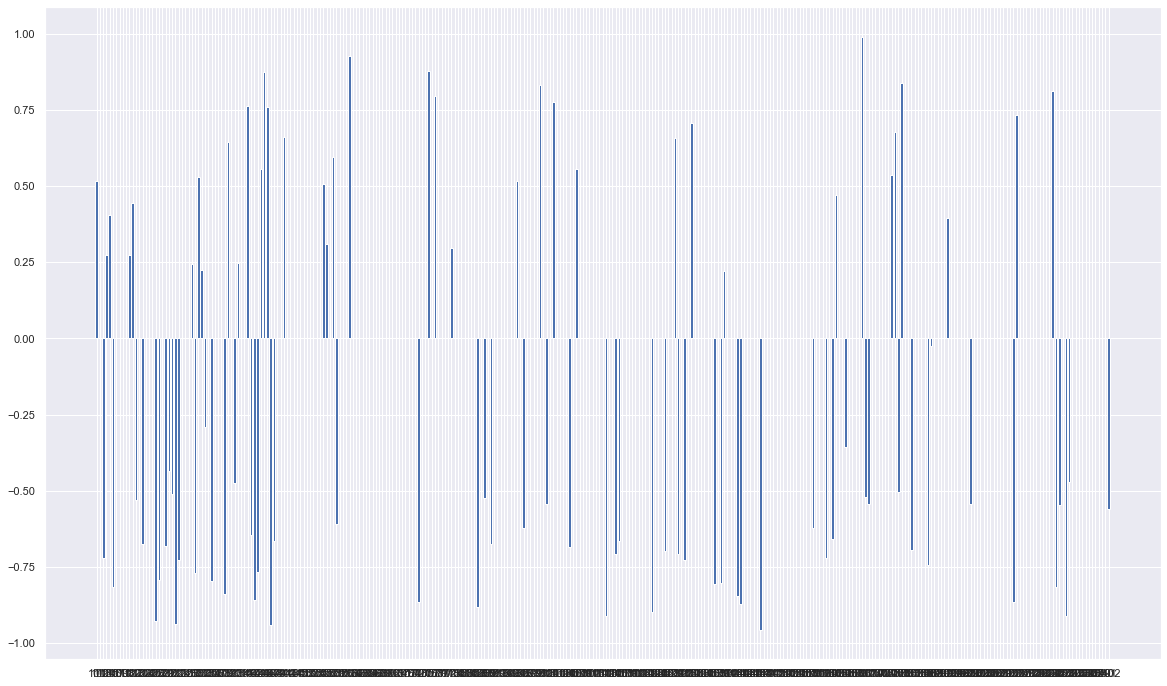

In [52]:
plt.figure(figsize=(20,12))
plt.bar(df_char_lines[df_char_lines.Character == 'Kenny'].Episode, df_char_lines[df_char_lines.Character == 'Kenny'].compound)

I need a column with the seasons so we can group by season. A plot for every episode is too chaotic.

In [32]:
def getSeason(x):
    return df_episodes[df_episodes.Code == x].Season.values[0]


df_char_lines['Season'] = df_char_lines.Episode.apply(lambda x : getSeason(x))

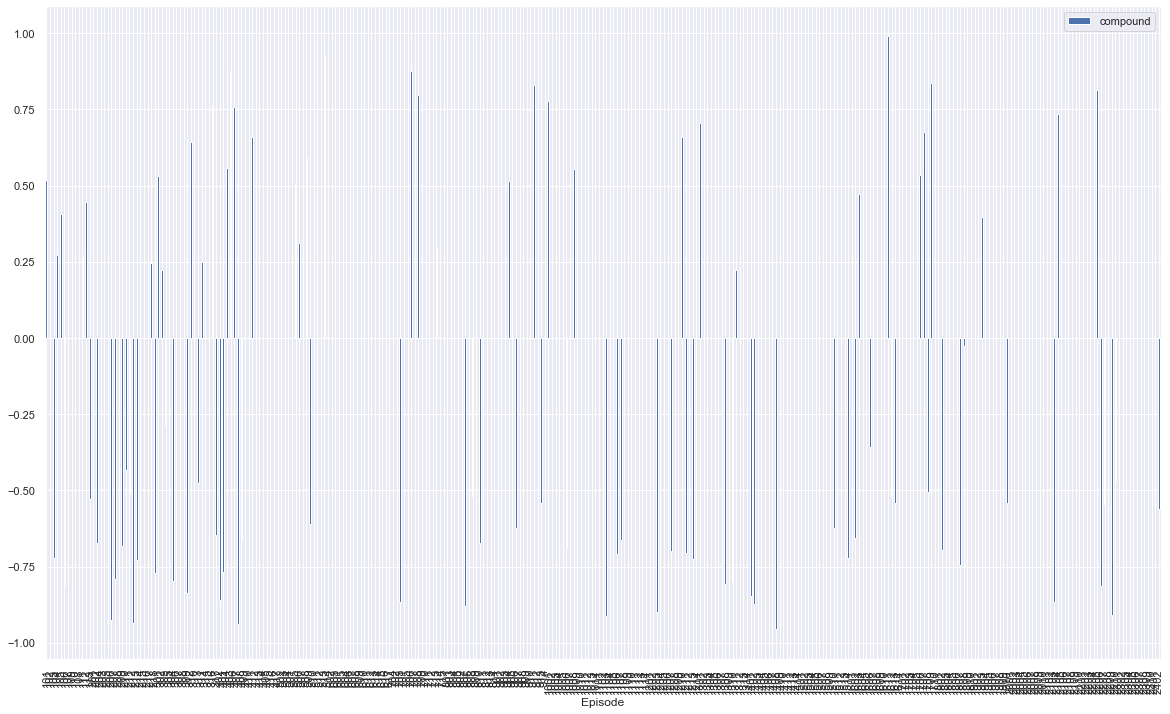

In [54]:
df_char_lines[df_char_lines.Character == 'Kenny'].plot(kind='bar',x='Episode', y='compound',figsize=(20,12))

In [33]:
df_char_lines.head()

,Character,Episode,Clean_text,Sentiment_Scores,neg,neu,pos,compound,Episode_Numeric,Season
0,Cartman,101,I know what it means! I'm not telling you. He-...,"{'neg': 0.15, 'neu': 0.751, 'pos': 0.099, 'com...",0.150,0.751,0.099,-0.9933,101,1
1,Cartman,102,"Ugh, I hate those things. Well, you know, you'...","{'neg': 0.088, 'neu': 0.715, 'pos': 0.197, 'co...",0.088,0.715,0.197,0.9959,102,1
2,Cartman,103,"Okay, Mom. Dude, that's sick mom. Drive, Drive...","{'neg': 0.144, 'neu': 0.721, 'pos': 0.135, 'co...",0.144,0.721,0.135,-0.9195,103,1
3,Cartman,104,"Eh. You're making me sick, dude. No way. Every...","{'neg': 0.199, 'neu': 0.722, 'pos': 0.079, 'co...",0.199,0.722,0.079,-0.9888,104,1
4,Cartman,105,"Hey Stan, where'd you get that black eye? Your...","{'neg': 0.161, 'neu': 0.727, 'pos': 0.112, 'co...",0.161,0.727,0.112,-0.9840,105,1


In [34]:
df_char_lines.to_csv('Character_lines_episodes.csv', index=False)

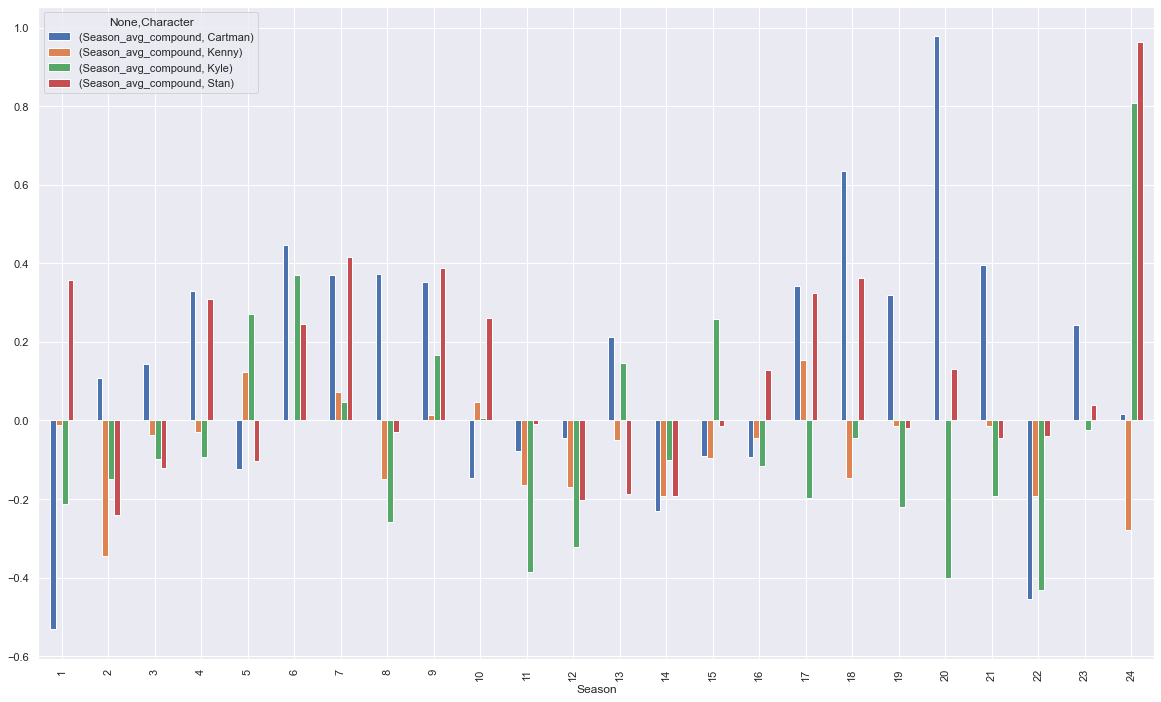

In [35]:
test = df_char_lines.groupby(['Season', 'Character']).agg(Season_avg_compound=('compound', 'mean')).unstack('Character')\
        .plot(kind='bar',figsize=(20,12))

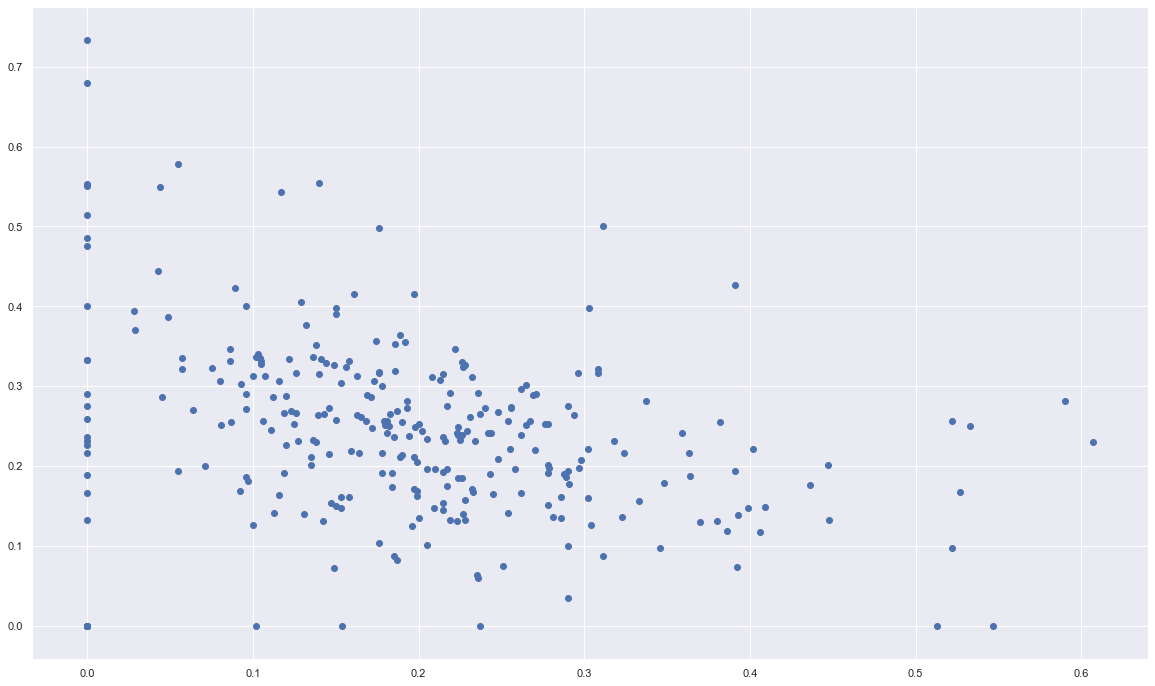

In [39]:
plt.figure(figsize=(20,12))
plt.scatter(df_char_lines[df_char_lines.Character == 'Kyle'].neg, df_char_lines[df_char_lines.Character == 'Kyle'].pos)

In [40]:
df_char_lines[df_char_lines.Character == 'Cartman'].Episode_Numeric

0       101
1       102
2       103
3       104
4       105
       ... 
304    2308
305    2309
306    2310
307    2401
308    2402
Name: Episode_Numeric, Length: 309, dtype: int64

In [41]:
df_char_lines[df_char_lines.Character == 'Kenny']

,Character,Episode,Clean_text,Sentiment_Scores,neg,neu,pos,compound,Episode_Numeric
309,Kenny,101,"[oh, nooo, look, foot, touch, worry, alright, ...","{'neg': 0.31, 'neu': 0.552, 'pos': 0.138, 'com...",0.310,0.552,0.138,-0.3595,101
310,Kenny,102,"[big, biggest, breast, seen, oh]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,102
311,Kenny,103,"[maybe, suck, hey, little, like, vagina, thank...","{'neg': 0.265, 'neu': 0.36, 'pos': 0.374, 'com...",0.265,0.360,0.374,0.4641,103
312,Kenny,104,"[oh, think, screwing, check, think, said, gay,...","{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",0.444,0.556,0.000,-0.5859,104
313,Kenny,105,"[hey, guy, talked, told, almost, mmmmmm, gonna...","{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.000,0.824,0.176,0.4939,105
...,...,...,...,...,...,...,...,...,...
613,Kenny,2308,"[yeah, anything, morrow, got, flushing]","{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.000,0.645,0.355,0.2960,2308
614,Kenny,2309,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,2309
615,Kenny,2310,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,2310
616,Kenny,2401,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,2401


# Sentimental analysis - sesons

In [97]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wojtek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sid=SentimentIntensityAnalyzer()

In [98]:
df_lines['Sentiment_Scores'] = df_lines['Lines_clean'].apply(lambda x: sid.polarity_scores(''.join(x)))

In [100]:
df_lines = pd.concat([df_lines, df_lines['Sentiment_Scores'].apply(pd.Series)], axis=1)

In [101]:
df_lines

,Character,Lines,Lines_clean,Code,Season,Sentiment_Scores,neg,neu,pos,compound
0,The boys,"School days, school days, teacher's golden ru...","School days, school days, teachers golden ru...",101,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
1,Kyle Broflovski,"Ah, damn it! My little brother's trying to fol...","Ah, damn it! My little brothers trying to foll...",101,1,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",0.20,0.800,0.000,-0.4574
2,Ike Broflovski,Eat banana.,Eat banana.,101,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
3,Kyle,"Ike, you can't come to school with me. [Ike Ch...","Ike, you cant come to school with me.",101,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
4,Eric Cartman,"Yeah, go home you little dildo!","Yeah, go home you little dildo!",101,1,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.00,0.667,0.333,0.3595
...,...,...,...,...,...,...,...,...,...,...
84234,Clyde,"Hey, Cartman!","Hey, Cartman!",2402,24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
84235,Cartman,[turns to face Clyde] Yeah?,Yeah?,2402,24,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.00,0.000,1.000,0.2960
84236,Clyde,[standing with Jimmy and an unnamed Hispanic k...,"Dude, theyre reopening Casa Bonita this weeke...",2402,24,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000
84237,Cartman,[he takes off his mask] Casa Bonita?! Hell yea...,"Casa Bonita?! Hell yeah, Ill come! Oh, wait!...",2402,24,"{'neg': 0.48, 'neu': 0.434, 'pos': 0.087, 'com...",0.48,0.434,0.087,-0.8994


In [133]:
df_lines.to_csv("lines.csv")

In [136]:
df_grouped_season = df_lines.groupby(['Season']).agg(Season_avg_compound=('compound', 'mean'),
                                          Season_min_compound=('compound', 'min'),
                                        Season_max_compound=('compound', 'max'),
                                        Season_negativ_count=('compound', lambda x: (x<0).sum()),
                                        Season_pos_count=('compound', lambda x: (x>=0).sum()))

In [137]:
df_grouped_season.Season_negativ_count.sum() + df_grouped_season.Season_pos_count.sum()

84239.0

<AxesSubplot:xlabel='Season'>

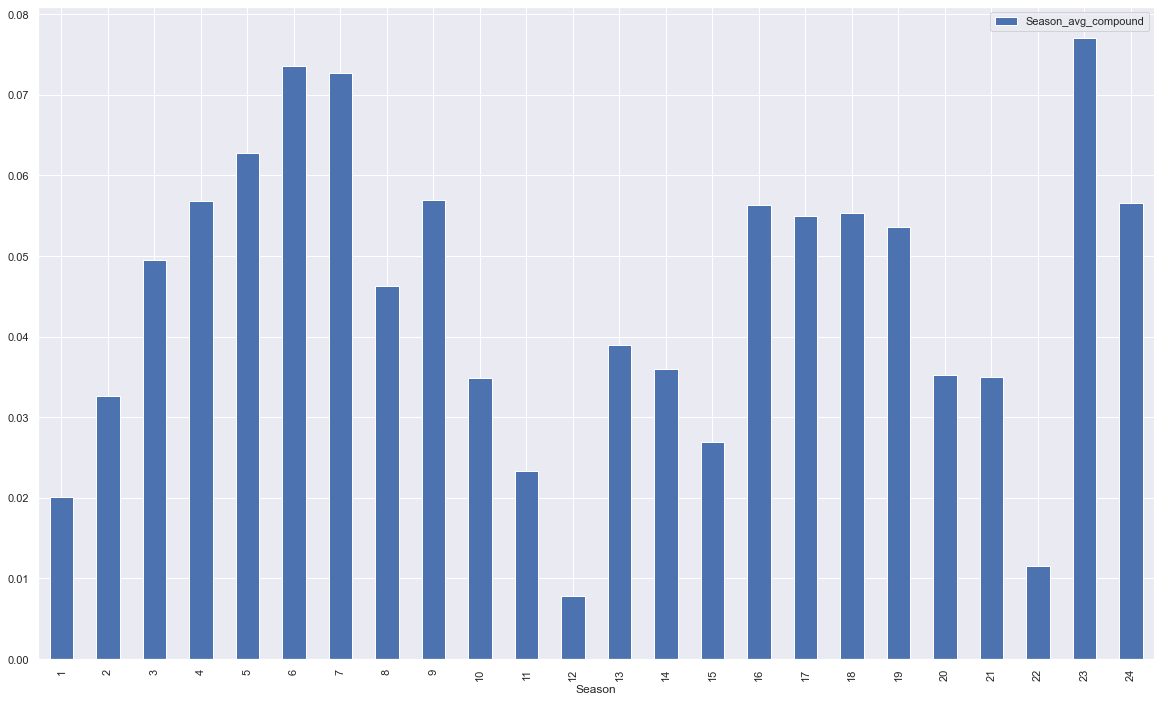

In [114]:
df_grouped_season.plot(y='Season_avg_compound',kind='bar',figsize=(20,12))

<AxesSubplot:xlabel='Season'>

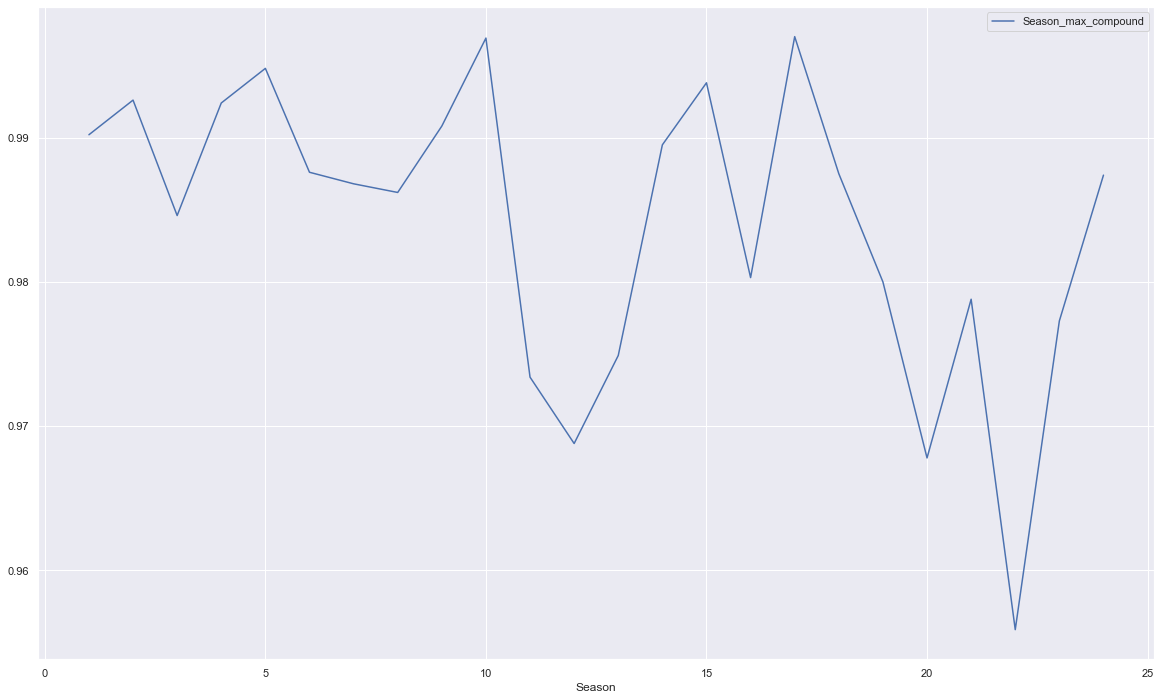

In [134]:
df_grouped_season.plot(y='Season_max_compound',kind='line',figsize=(20,12))

<AxesSubplot:xlabel='Season'>

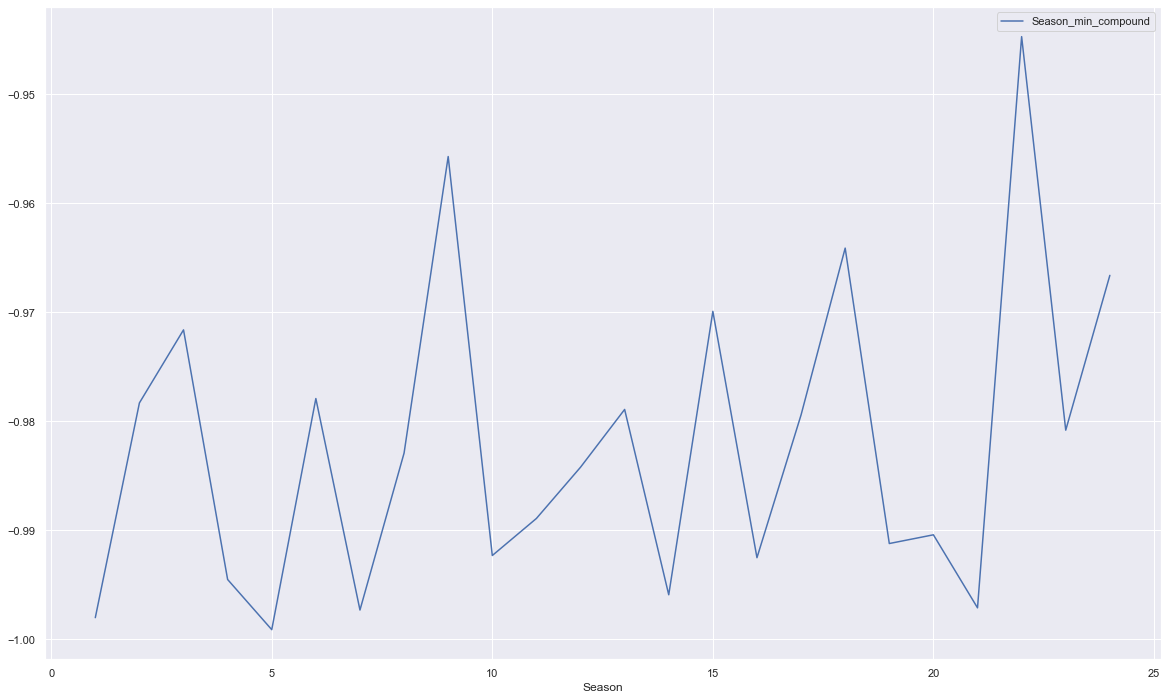

In [135]:
df_grouped_season.plot(y='Season_min_compound',kind='line',figsize=(20,12))

# Episodes network

In [10]:
episode_edges = [list(combinations(cast, 2)) for cast in df_episodes.Cast.values]

In [11]:
G = nx.Graph()
G.add_nodes_from(df_characters.Name.values)

In [12]:
edges = [edge for episode_edges_list in episode_edges for edge in episode_edges_list]

In [13]:
G.add_edges_from(set(edges))

In [14]:
G.edges()

EdgeView([('Ghost Hunters', 'Kyle Broflovski'), ('Ghost Hunters', 'Kenny McCormick'), ('Ghost Hunters', 'Dr. Phillips'), ('Ghost Hunters', 'DJ AM'), ('Ghost Hunters', 'Bea Arthur'), ('Ghost Hunters', 'Walter Cronkite'), ('Ghost Hunters', 'Dr. Carroll'), ('Ghost Hunters', 'Michael Jackson'), ('Ghost Hunters', 'Dr. Land'), ('Ghost Hunters', 'David Carradine'), ('Ghost Hunters', 'Patrick Swayze'), ('Ghost Hunters', 'Sheila Broflovski'), ('Ghost Hunters', 'Stan Marsh'), ('Ghost Hunters', 'Billy Mays'), ('Ghost Hunters', 'Gerald Broflovski'), ('Ghost Hunters', 'Ed McMahon'), ('Ghost Hunters', 'Ike Broflovski'), ('Ghost Hunters', 'Eric Cartman'), ('Christina Aguilera', 'Carol McCormick'), ('Christina Aguilera', 'Eric Cartman'), ('Christina Aguilera', 'Herbert Garrison'), ('Christina Aguilera', 'Terrance and Phillip'), ('Christina Aguilera', 'Timmy Burch'), ('Christina Aguilera', 'Wendy Testaburger'), ('Christina Aguilera', 'Skyler Morse'), ('Christina Aguilera', 'Charlie Rose'), ('Christina 

In [15]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
gcc = G.subgraph(Gcc[0])

In [16]:
len(gcc.edges())

24439

In [17]:
len(gcc.nodes())

1248

In [18]:
node_sizes = [2*v for v in dict(gcc.degree).values()]

In [19]:
# Setup FA2 w. parameters
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,    # Dissuade hubs
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=True,
    gravity=1.0,

    # Log
    verbose=False
)

# compute node positions with the fa algorithm
node_pos = forceatlas2.forceatlas2_networkx_layout(gcc, pos=None, iterations=2000)

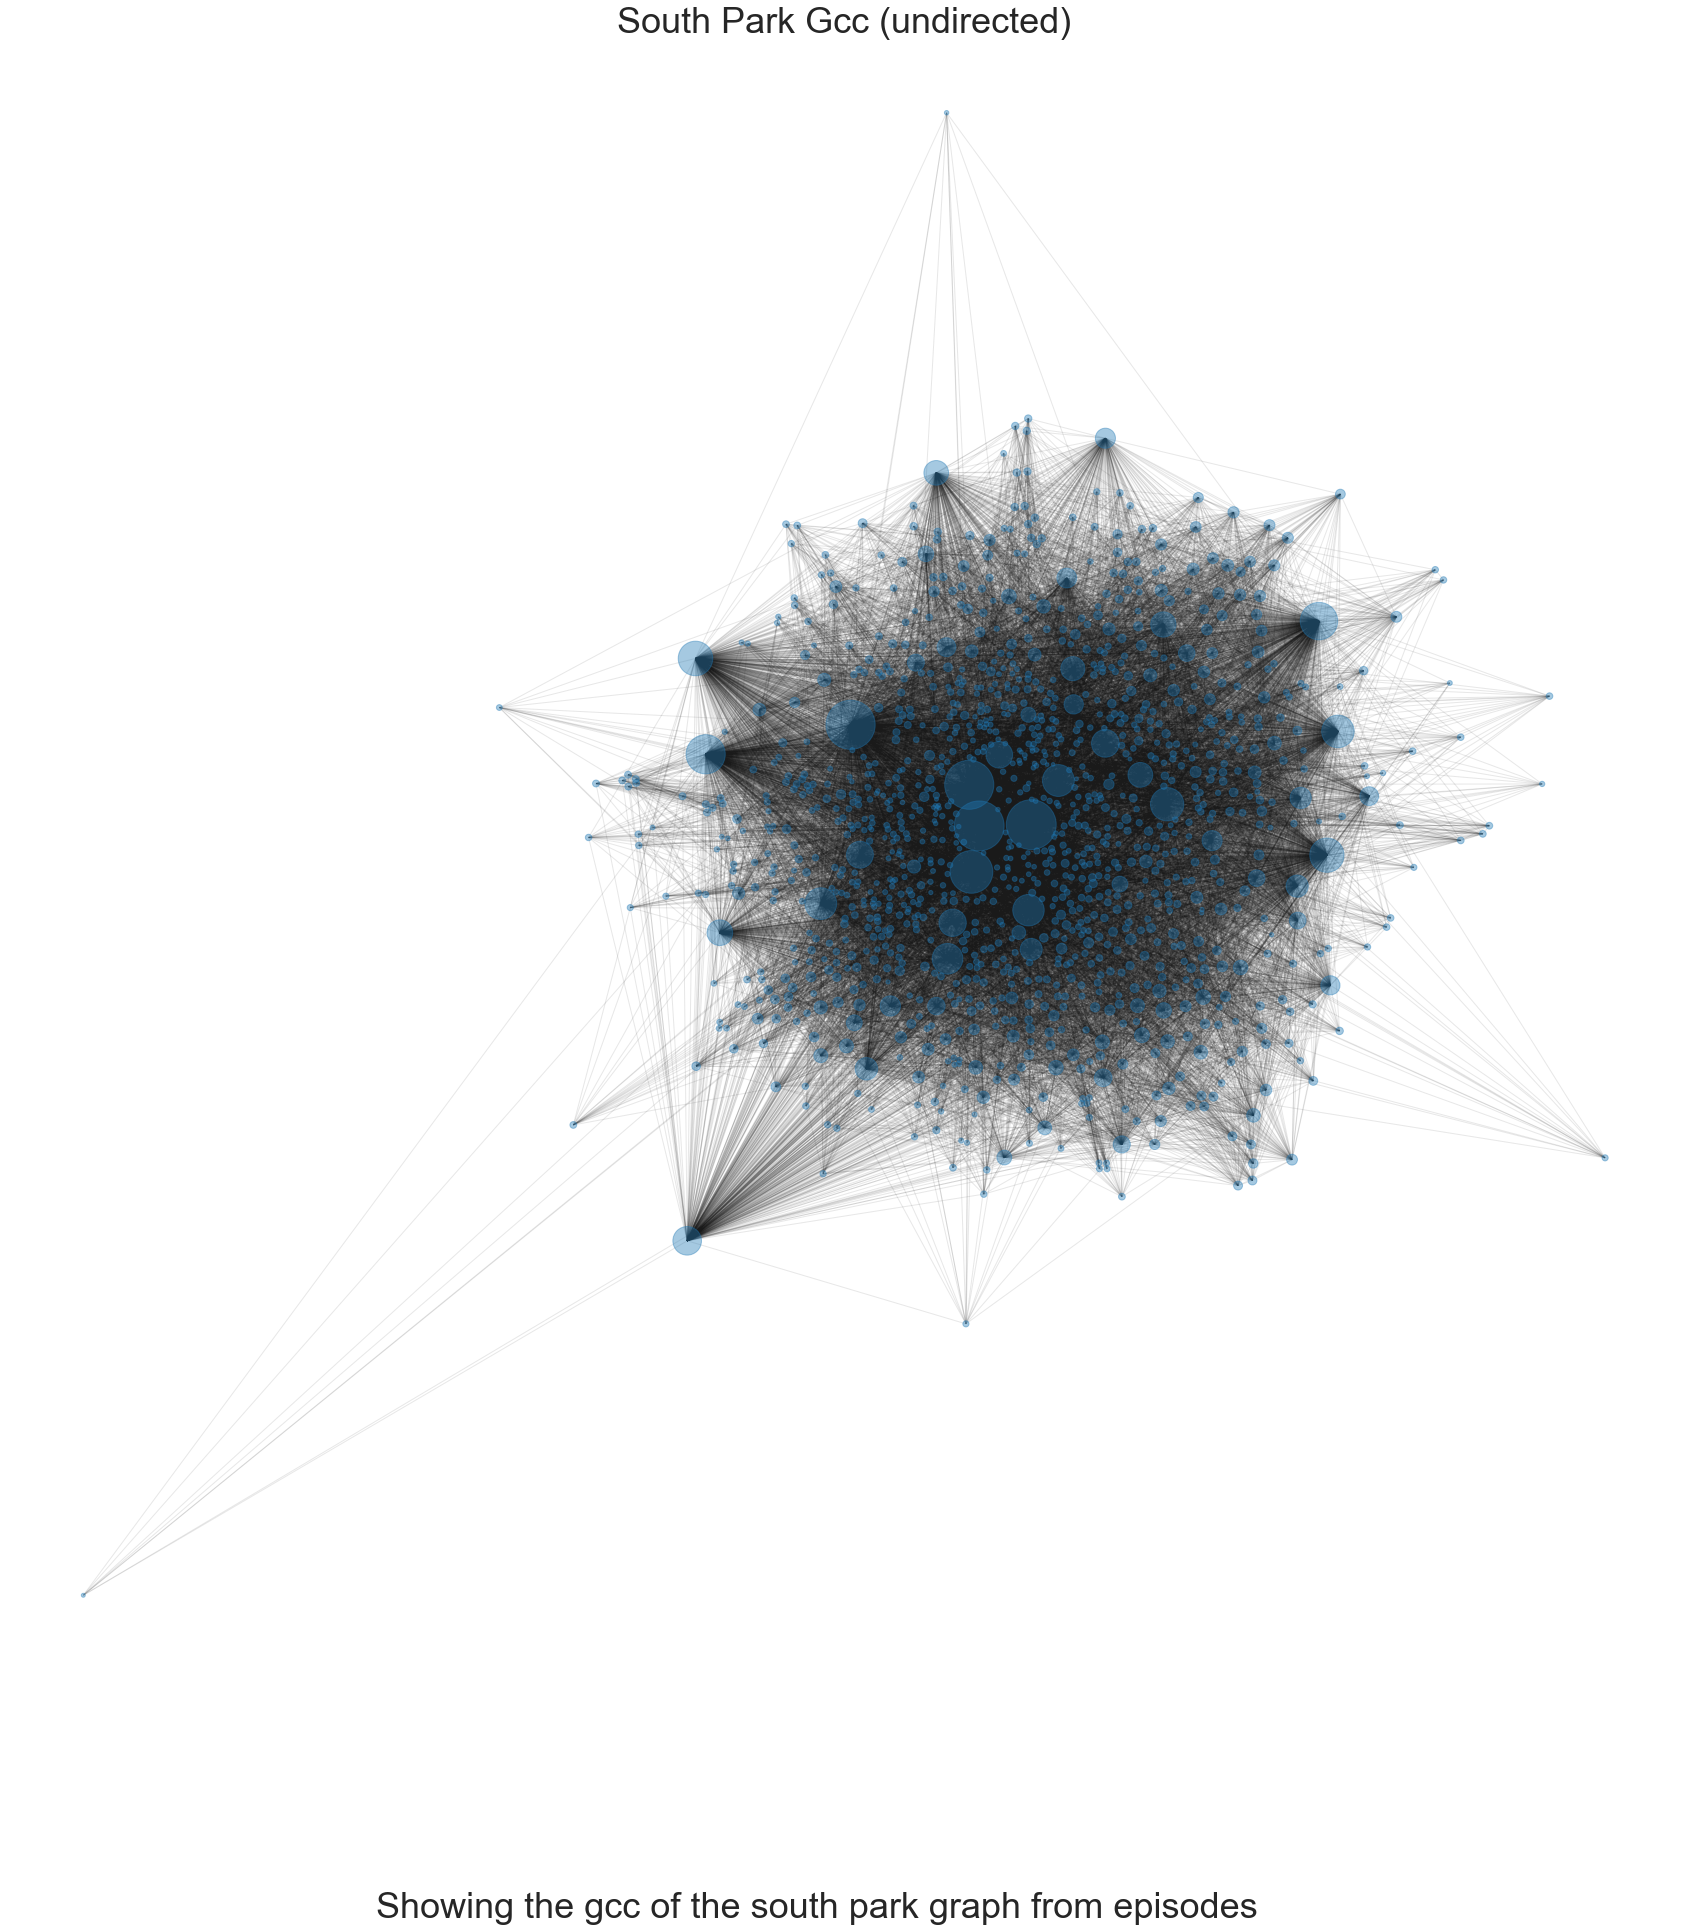

In [20]:
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(gcc, node_pos, node_size=node_sizes, alpha=0.4)
nx.draw_networkx_edges(gcc, node_pos, alpha=0.1)
# nx.draw_networkx_labels(gcc, node_pos, font_size=18)
plt.title('South Park Gcc (undirected)', fontsize=36)
plt.axis('off')
fig_text = """Showing the gcc of the south park graph from episodes"""
plt.figtext(
    0.5, 0.01, wrap=True, horizontalalignment='center', fontsize=36, s=fig_text
)
# plt.savefig("Graph_episodes.png", format="PNG")
plt.show()

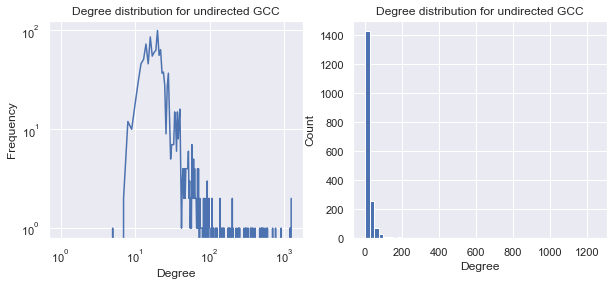

In [21]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
degree_freq = nx.degree_histogram(gcc)
degrees = range(len(degree_freq))
ax[0].loglog(degrees, degree_freq,'-') 
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Frequency')
ax[0].set_title("Degree distribution for undirected GCC")
degrees = [val for (node, val) in G.degree()]
d1 = np.array(degrees)
ax[1].hist(d1, bins = 50) 
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Count')
_= ax[1].set_title("Degree distribution for undirected GCC")

In [22]:
sorted(gcc.degree, key=lambda x: x[1], reverse=True)[0:25]

[('Eric Cartman', 1247),
 ('Kenny McCormick', 1247),
 ('Stan Marsh', 1211),
 ('Kyle Broflovski', 1208),
 ('Butters Stotch', 915),
 ('Randy Marsh', 769),
 ('Herbert Garrison', 702),
 ('Mr. Mackey', 598),
 ('Sharon Marsh', 589),
 ('Gerald Broflovski', 556),
 ('Sheila Broflovski', 530),
 ('Liane Cartman', 509),
 ('Clyde Donovan', 506),
 ('Stephen Stotch', 496),
 ('Craig Tucker', 471),
 ('Jimmy Valmer', 410),
 ('Jimbo Kern', 384),
 ('Token Black', 375),
 ('Wendy Testaburger', 363),
 ('Principal Victoria', 355),
 ('Linda Stotch', 330),
 ('Mayor McDaniels', 320),
 ('Ike Broflovski', 308),
 ('Jerome "Chef" McElroy', 305),
 ('Officer Barbrady', 290)]

In [23]:
nx.write_gpickle(gcc, 'network/SouthParkEpisodesNetwork.gpickle')